In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

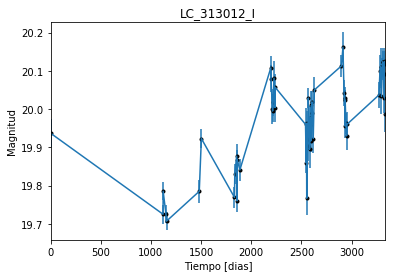

In [2]:
data = np.genfromtxt('LC_313012_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_313012_I')
plt.savefig("LC_313012_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

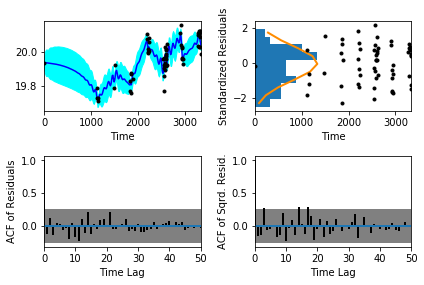

In [5]:
sample.assess_fit()

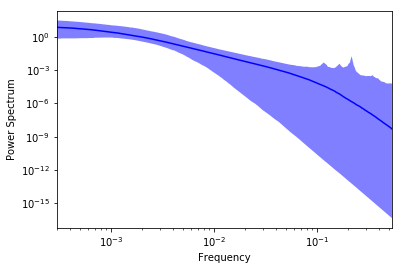

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

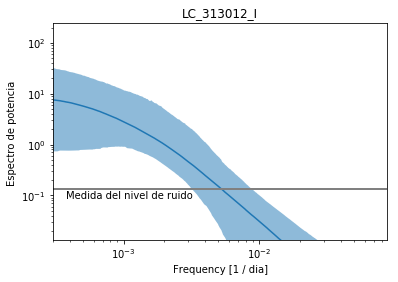

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_313012_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_313012_I')

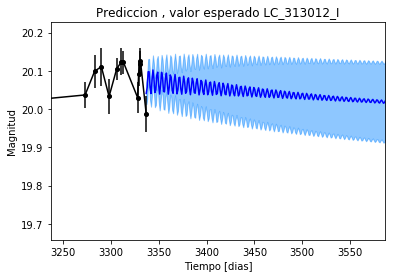

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_313012_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_313012_I')

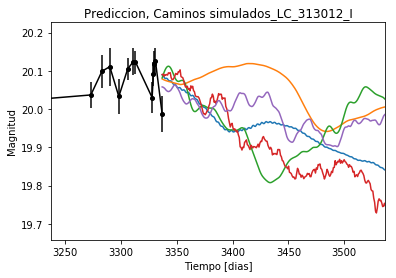

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_313012_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


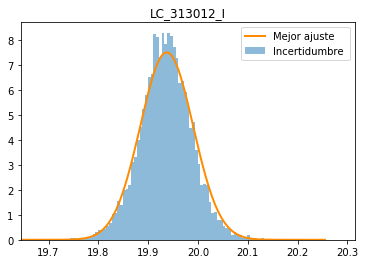

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_313012_I')
plt.savefig("Mejor_ajuste_LC_313012_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_313012_I')

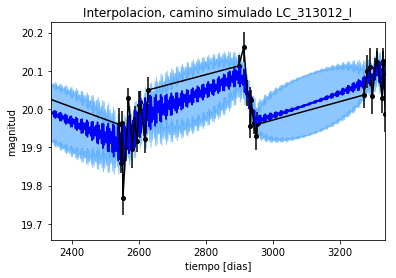

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_313012_I')

Text(0.5,1,'Interpolacion, camino simulado LC_313012_I')

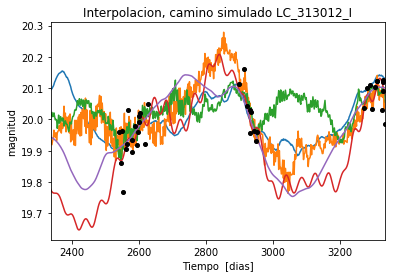

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_313012_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 998.281144229
Median: 0.0115778491945
Standard deviation: 0.19736499264
68% credibility interval: [ 0.00142766  0.15948916]
95% credibility interval: [  4.17402594e-04   8.06151606e-01]
99% credibility interval: [  3.20813698e-04   9.98110411e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 483.533193958
Median: 0.00540659816766
Standard deviation: 0.107180225311
68% credibility interval: [ 0.00087159  0.04655471]
95% credibility interval: [ 0.00036723  0.33589993]
99% credibility interval: [  3.14566101e-04   8.22315134e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 208.138264789
Median: 0.114625240944
Standard dev

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 4339.24230195
Median: 99.5502639116
Standard deviation: 2.09875273522
68% credibility interval: [  97.76458248  101.50932662]
95% credibility interval: [  95.34103149  103.89140933]
99% credibility interval: [  93.17061553  105.22824699]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 336.132473132
Median: 1.51441248683
Standard deviation: 2.54925469151
68% credibility interval: [ 0.1730699   4.98593153]
95% credibility interval: [ 0.02518683  9.17871689]
99% credibility interval: [  0.01522101  12.25623314]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 582.088209189
Median: 2.03249063337
Standard deviation: 11.9328929093
68% credibility interval: [  0.1600452   17.15915677]
95% credibility interval: [  2.93481957e

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 584.116113674
Median: 4.42441395454e-40
Standard deviation: 4.87426601631e+43
68% credibility interval: [  3.41435648e-76   3.93425470e-11]
95% credibility interval: [  3.22791596e-125   6.36396657e+001]
99% credibility interval: [  1.95072755e-153   6.99107152e+034]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1874.09052945
Median: 19.9311942468
Standard deviation: 0.0682687362192
68% credibility interval: [ 19.87323055  19.98974648]
95% credibility interval: [ 19.79250324  20.06629316]
99% credibility interval: [ 19.72742306  20.15793034]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 605.698246671
Median: 0.157517052712
Standard deviation: 0.279114159728
68% credibility interval: [ 0.          0.58819664]
95% credibility interval: [ 0.        0.933484]
99% credibility interval: [ 0.          1.03120536]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 605.698246671
Median: 0.157517052712
Standard deviation: 0.279114159728
68% credibility interval: [ 0.          0.58819664]
95% credibility interval: [ 0.        0.933484]
99% credibility interval: [ 0.          1.03120536]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 310.796282161
Median: 0.0
Standard deviation: 0.000661936964125
68% credibility 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 4339.24230195
Median: 99.5502639116
Standard deviation: 2.09875273522
68% credibility interval: [  97.76458248  101.50932662]
95% credibility interval: [  95.34103149  103.89140933]
99% credibility interval: [  93.17061553  105.22824699]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1890.68999493
Median: 0.0209506970172
Standard deviation: 0.0192235712378
68% credibility interval: [ 0.01292415  0.03530785]
95% credibility interval: [ 0.00844616  0.06919387]
99% credibility interval: [ 0.00684024  0.12893943]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 688.864262792
Median: 1.39348133971
Standard deviation: 0.272671669237
68% credibility interval: [ 1.10333142  1.68341797]
95% credibility interval: [ 0.87458104  1.900445  ]
99% credibility interval: [ 0.7357971   1.97669527]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 259.647769826
Median: 0.00768312277818
Standard deviation: 0.361246429752
68% credibility interval: [  7.97075200e-05   1.48270398e-01]
95% credibility interval: [  9.70927248e-08   1.14030136e+00]
99% credibility interval: [  2.35868855e-39   2.32527918e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 998.281144229
Median: (-0.0727457719476-0.318190497662j)
Standard deviation: 2.14787226898
68% credibility interval: [-1.00209992-0.94786195j -0.00897023-0.02089013j]
95% credibility interval: [ -5.06519993e+00+0.j          -2.62261785e-03-0.84161325j]
99% credibility interval: [ -6.27131267e+00-0.01595616j  -2.01573192e-03-0.00396358j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 483.533193958
Median: (-0.0339706581689+4.08129251482j)
Standard deviation: 1.87858114985
68% credibility interval: [-0.29251184+4.89549134j -0.00547638+0.01575698j]
95% credibility interval: [-2.11052148+6.03726701j -0.00230740+0.j        ]
99% credibility interval: [ -5.16675837e+00+5.13211666j  -1.97647710e-03+1.86165762j]
Posterior sum